<a href="https://colab.research.google.com/github/xeeteex/data_mining_achs/blob/main/stock_history_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab 1

- Extract the price history of ten commercial banks from the given api:https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol=ADBL&fromDate=2025-04-19&toDate=2025-05-19&pageNo=1&itemsPerPage=10&pagePerDisplay=5&_=1747618698241

- Save the data in .csv

- Clean the data if necessary

- Convert the daily to weekly format and plot it

- Convert the data to monthly format and plot it

- Calculate the following technical indicators from the data and plot them.

  - Moving Average
  - Weighted Moving Average
  - RSI
  - OBV

In [ ]:
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def fetch_stock_history(stock_symbol, from_date, to_date, output_file=None):
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    params = {
        "stockSymbol": stock_symbol,
        "fromDate": from_date,
        "toDate": to_date,
        "pageNo": 1,
        "itemsPerPage": 15000,
        "pagePerDisplay": 5,
        "_": "1747618698241"
    }

    response = requests.get(url, params=params)
    json_data = response.json()

    stock_data = json_data.get("result", {}).get("data", [])

    if not stock_data:
        print("No stock data found in the API response.")
        return

    # Use default file name if not provided
    if not output_file:
        output_file = f"{stock_symbol}_stock_history.csv"

    with open(output_file, mode='w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        headers = list(stock_data[0].keys())
        writer.writerow(headers)
        for row in stock_data:
            writer.writerow([row.get(header, "") for header in headers])

    print(f"CSV file '{output_file}' has been created with {len(stock_data)} rows.")



In [ ]:
fetch_stock_history("STC", "2021-01-01", "2023-01-01", output_file="salt_2021.csv")


CSV file 'salt_2021.csv' has been created with 482 rows.


In [ ]:
salt_2021 = pd.read_csv("/content/salt_2021.csv")
salt_2021

,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,1,2023-01-01T00:00:00,2023-01-01,3910.0,3841.0,3860.0,76,1907,7388712.0,3834.0,26.0,0.68
1,2,2022-12-29T00:00:00,2022-12-29,3835.2,3723.0,3834.0,45,1371,5189369.0,3742.0,92.0,2.46
2,3,2022-12-28T00:00:00,2022-12-28,3770.0,3707.0,3742.0,42,1186,4444184.0,3760.0,-18.0,-0.48
3,4,2022-12-27T00:00:00,2022-12-27,3770.0,3675.0,3760.0,112,4092,15274125.5,3650.0,110.0,3.01
4,5,2022-12-26T00:00:00,2022-12-26,3650.0,3555.0,3650.0,33,489,1772629.0,3550.0,100.0,2.82
...,...,...,...,...,...,...,...,...,...,...,...,...
477,478,2021-01-07T00:00:00,2021-01-07,7000.0,6411.0,6740.0,110,2589,17322637.0,6400.0,340.0,5.31
478,479,2021-01-06T00:00:00,2021-01-06,6848.0,6290.0,6400.0,64,1680,10805135.0,6470.0,-70.0,-1.08
479,480,2021-01-05T00:00:00,2021-01-05,6887.0,6210.0,6470.0,128,3071,20131645.0,6895.0,-425.0,-6.16
480,481,2021-01-04T00:00:00,2021-01-04,7254.0,6777.0,6895.0,34,535,3766785.0,6909.0,-14.0,-0.20


In [ ]:
salt_2021.head(10)


,sn,tradeDate,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
0,1,2023-01-01T00:00:00,2023-01-01,3910.0,3841.0,3860.0,76,1907,7388712.0,3834.0,26.0,0.68
1,2,2022-12-29T00:00:00,2022-12-29,3835.2,3723.0,3834.0,45,1371,5189369.0,3742.0,92.0,2.46
2,3,2022-12-28T00:00:00,2022-12-28,3770.0,3707.0,3742.0,42,1186,4444184.0,3760.0,-18.0,-0.48
3,4,2022-12-27T00:00:00,2022-12-27,3770.0,3675.0,3760.0,112,4092,15274125.5,3650.0,110.0,3.01
4,5,2022-12-26T00:00:00,2022-12-26,3650.0,3555.0,3650.0,33,489,1772629.0,3550.0,100.0,2.82
5,6,2022-12-22T00:00:00,2022-12-22,3560.0,3530.0,3550.0,31,926,3284427.0,3590.0,-40.0,-1.11
6,7,2022-12-21T00:00:00,2022-12-21,3590.0,3582.0,3590.0,10,274,983460.0,3628.9,-38.9,-1.07
7,8,2022-12-20T00:00:00,2022-12-20,3635.0,3594.0,3628.9,23,816,2950497.0,3595.5,33.4,0.93
8,9,2022-12-19T00:00:00,2022-12-19,3643.0,3525.0,3595.5,15,433,1547845.0,3590.0,5.5,0.15
9,10,2022-12-18T00:00:00,2022-12-18,3595.0,3535.0,3590.0,17,222,792605.0,3570.0,20.0,0.56


## Index to trade date and removes emptu rows with missing values


In [ ]:
df = pd.read_csv('/content/salt_2021.csv', parse_dates=["tradeDate"])
df.set_index("tradeDate", inplace=True)
df.sort_index(inplace=True)
df.dropna(inplace=True)
df


,sn,tradeDateString,maxPrice,minPrice,closingPrice,noOfTransactions,volume,amount,previousClosing,differenceRs,percentChange
tradeDate,,,,,,,,,,,
2021-01-03,482,2021-01-03,6909.0,6406.0,6909.0,113,3202,22019048.0,6281.0,628.0,10.00
2021-01-04,481,2021-01-04,7254.0,6777.0,6895.0,34,535,3766785.0,6909.0,-14.0,-0.20
2021-01-05,480,2021-01-05,6887.0,6210.0,6470.0,128,3071,20131645.0,6895.0,-425.0,-6.16
2021-01-06,479,2021-01-06,6848.0,6290.0,6400.0,64,1680,10805135.0,6470.0,-70.0,-1.08
2021-01-07,478,2021-01-07,7000.0,6411.0,6740.0,110,2589,17322637.0,6400.0,340.0,5.31
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,5,2022-12-26,3650.0,3555.0,3650.0,33,489,1772629.0,3550.0,100.0,2.82
2022-12-27,4,2022-12-27,3770.0,3675.0,3760.0,112,4092,15274125.5,3650.0,110.0,3.01
2022-12-28,3,2022-12-28,3770.0,3707.0,3742.0,42,1186,4444184.0,3760.0,-18.0,-0.48


## Weekly closing Price

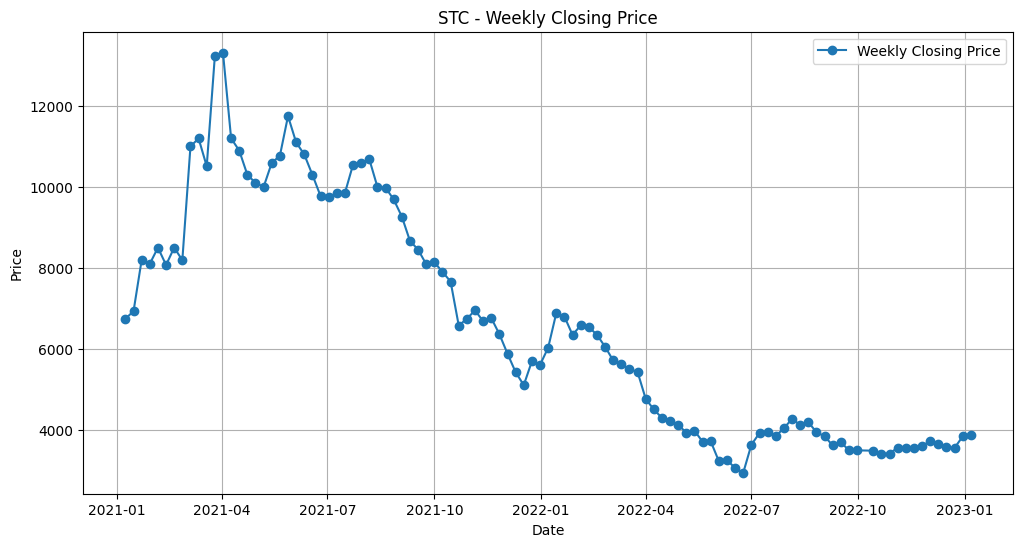

In [ ]:
symbol = "STC"
weekly = df.resample("W-FRI").agg({
            "closingPrice": "last",
            "maxPrice": "max",
            "minPrice": "min",
            "volume": "sum",
            "amount": "sum",
            "noOfTransactions": "sum"
        }).dropna() # Drop weeks with no data after resampling

plt.figure(figsize=(12, 6))
plt.plot(weekly.index, weekly["closingPrice"], marker='o', label="Weekly Closing Price")
plt.title(f"{symbol} - Weekly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

## Monthly closing price

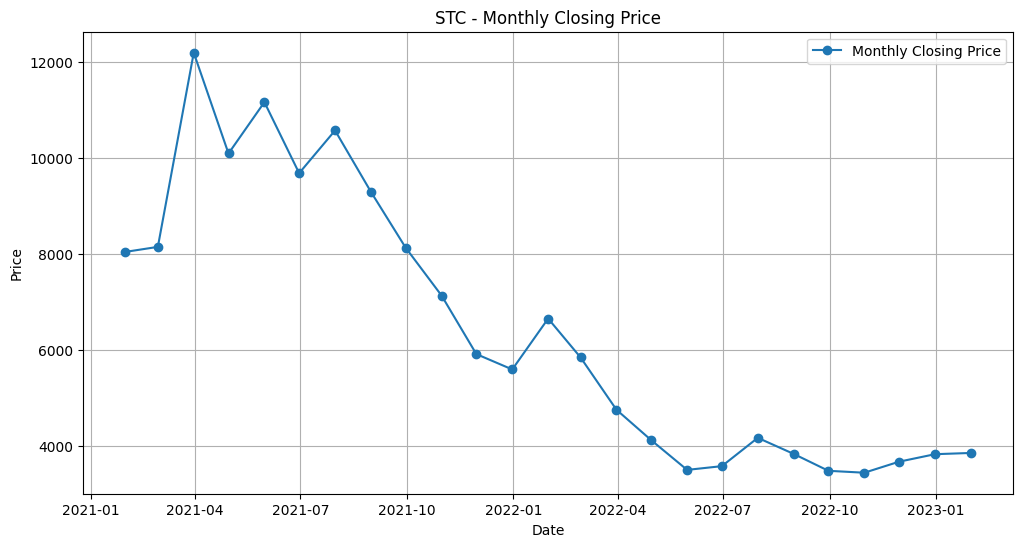

In [ ]:
monthly = df.resample("ME").agg({
    "closingPrice": "last",
    "maxPrice": "max",
    "minPrice": "min",
    "volume": "sum",
    "amount": "sum",
    "noOfTransactions": "sum"
}).dropna()

plt.figure(figsize=(12, 6))
plt.plot(monthly.index, monthly["closingPrice"], marker='o', label="Monthly Closing Price")
plt.title(f"{symbol} - Monthly Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

## Movig Averages

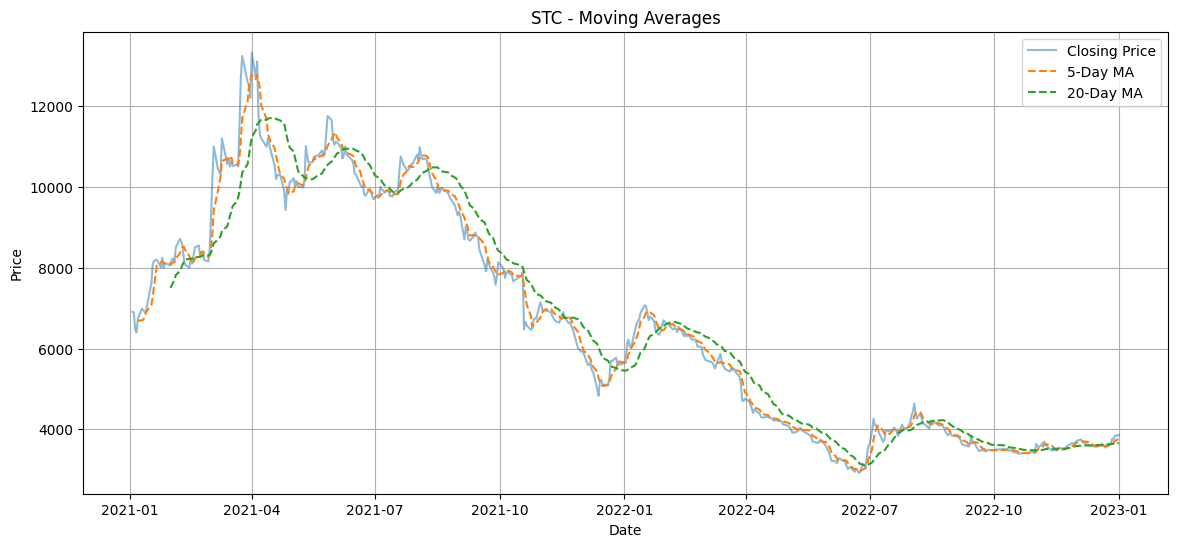

In [ ]:
df["MA_5"] = df["closingPrice"].rolling(window=5).mean()
df["MA_20"] = df["closingPrice"].rolling(window=20).mean()

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.5)
plt.plot(df.index, df["MA_5"], label="5-Day MA", linestyle="--")
plt.plot(df.index, df["MA_20"], label="20-Day MA", linestyle="--")
plt.title(f"{symbol} - Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Weighted Moving Averages

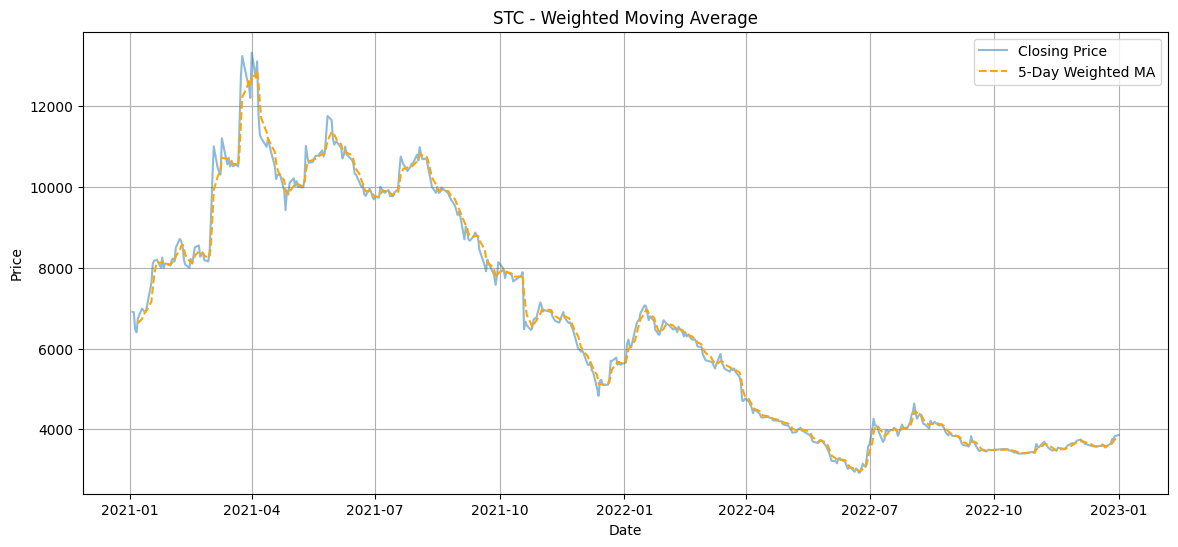

In [ ]:
def weighted_moving_avg(values):
    weights = np.arange(1, len(values)+1)
    return np.dot(values, weights) / weights.sum()

df["WMA_5"] = df["closingPrice"].rolling(window=5).apply(weighted_moving_avg, raw=True)

plt.figure(figsize=(14, 6))
plt.plot(df.index, df["closingPrice"], label="Closing Price", alpha=0.5)
plt.plot(df.index, df["WMA_5"], label="5-Day Weighted MA", linestyle="--", color='orange')
plt.title(f"{symbol} - Weighted Moving Average")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


## RSI

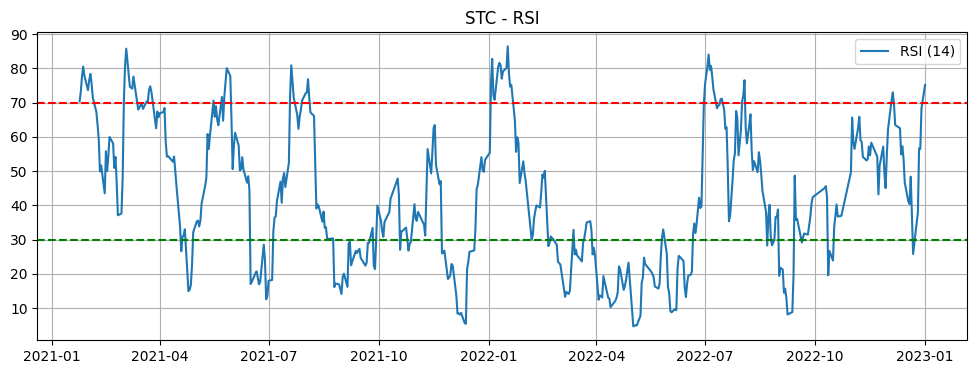

In [ ]:
def compute_RSI(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

df["RSI_14"] = compute_RSI(df["closingPrice"])

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["RSI_14"], label="RSI (14)")
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title(f"{symbol} - RSI")
plt.legend()
plt.grid(True)
plt.show()

## OBV

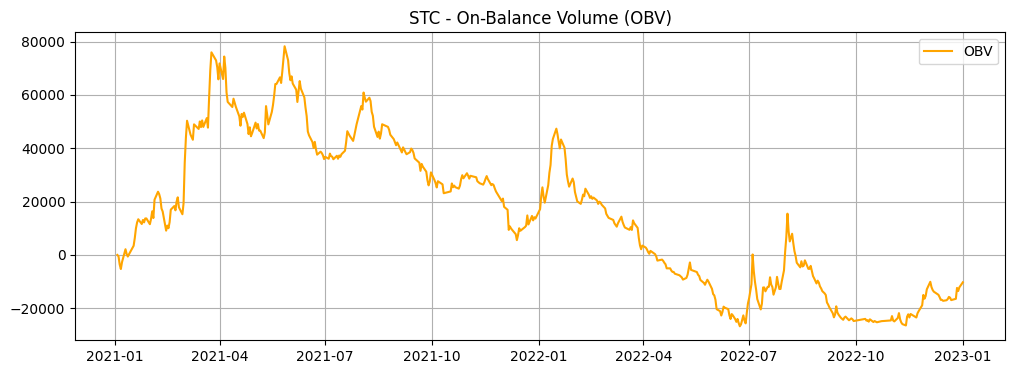

In [ ]:
def compute_OBV(df):
    obv = [0]
    for i in range(1, len(df)):
        if df['closingPrice'].iloc[i] > df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] + df['volume'].iloc[i])
        elif df['closingPrice'].iloc[i] < df['closingPrice'].iloc[i-1]:
            obv.append(obv[-1] - df['volume'].iloc[i])
        else:
            obv.append(obv[-1])
    return pd.Series(obv, index=df.index)

df["OBV"] = compute_OBV(df)

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["OBV"], label="OBV", color='orange')
plt.title(f"{symbol} - On-Balance Volume (OBV)")
plt.legend()
plt.grid(True)
plt.show()

CCI

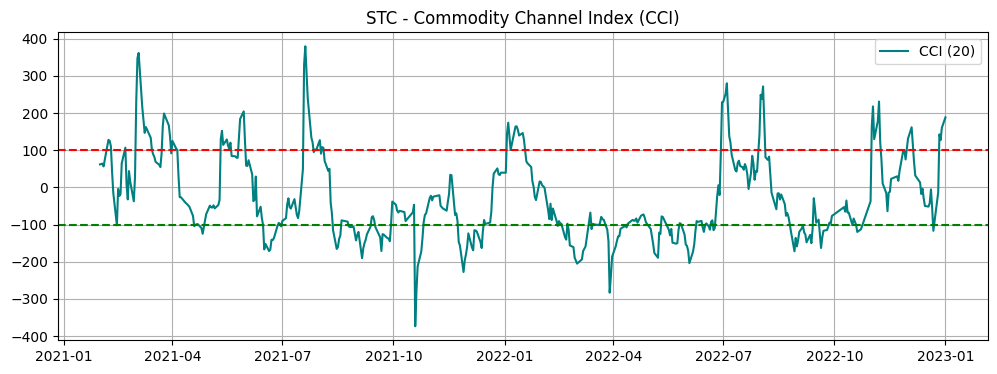

In [ ]:
def compute_CCI(df, window=20):
    TP = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
    MA = TP.rolling(window=window).mean()
    MD = TP.rolling(window=window).apply(lambda x: np.mean(np.abs(x - np.mean(x))), raw=True)
    return (TP - MA) / (0.015 * MD)

df["CCI_20"] = compute_CCI(df)

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["CCI_20"], label="CCI (20)", color='teal')
plt.axhline(100, color='red', linestyle='--')
plt.axhline(-100, color='green', linestyle='--')
plt.title(f"{symbol} - Commodity Channel Index (CCI)")
plt.legend()
plt.grid(True)
plt.show()